Ufuk Altun

using Pkg; pkg"add CUDA Knet IterTools FileIO JLD2 Images Plots PyCall"

In [47]:
using PyCall
@pyimport torch

In [48]:
include("models.jl");
include("training.jl");

#### Generate an alexnet model

In [49]:
model = generate_alexnet_model(; pretrained = true);

#### Set optimizers of each parameter to Adam. Parameter sizes should be:
##### Original Alexnet
- (11, 11, 3, 64)
- (1, 1, 64, 1)
- (5, 5, 64, 192)
- (1, 1, 192, 1)
- (3, 3, 192, 384)
- (1, 1, 384, 1)
- (3, 3, 384, 256)
- (1, 1, 256, 1)
- (3, 3, 256, 256)
- (1, 1, 256, 1)
- (4096, 9216)
- (4096,)
- (4096, 4096)
- (4096,)
- (7, 4096)
- (7,)

In [50]:
for param in params(model)
    param.opt = Adam(; lr=1e-5)
    println(size(param))
end

(11, 11, 3, 64)
(1, 1, 64, 1)
(5, 5, 64, 192)
(1, 1, 192, 1)
(3, 3, 192, 384)
(1, 1, 384, 1)
(3, 3, 384, 256)
(1, 1, 256, 1)
(3, 3, 256, 256)
(1, 1, 256, 1)
(4096, 9216)
(4096,)
(4096, 4096)
(4096,)
(7, 4096)
(7,)


#### Define batchsize, model path and target domain  

In [52]:
num_iter=1000
check_freq=20
batchsize = 128
atype = Array{Float32}
data_path = "/Users/ufukaltun/Documents/koç/dersler/ku deep learning/project";

#### Preprocess data, generate minibatches for each modain and generate a baseline minibach which contains three known domains

In [53]:
loss, acc = train("b", "PACS", "cartoon", model; num_iter=num_iter, 
                                                 check_freq=check_freq, 
                                                 batchsize=batchsize, 
                                                 data_path=data_path, 
                                                 atype=atype);

Datasets are loaded


[1, 00:00, 2.42i/s] 

First batch is trained successfully


[20, 11:47, 35.79s/i] 

Train loss: 1.6811548  Val loss: 1.6547217  Train acc: 0.3297275641025641  Val acc: 0.3411458333333333


[40, 29:01, 36.03s/i]  

Train loss: 1.372548  Val loss: 1.372881  Train acc: 0.4823717948717949  Val acc: 0.484375


[60, 46:24, 36.47s/i]  

Train loss: 1.166081  Val loss: 1.1536483  Train acc: 0.5731169871794872  Val acc: 0.5755208333333334


[80, 01:03:34, 36.67s/i] 

Train loss: 1.0069515  Val loss: 1.038829  Train acc: 0.6360176282051282  Val acc: 0.6067708333333334


[100, 01:20:49, 36.36s/i] 

Train loss: 0.8867362  Val loss: 0.9458806  Train acc: 0.6887019230769231  Val acc: 0.671875


[120, 01:38:05, 35.82s/i]  

Train loss: 0.7799274  Val loss: 0.9068277  Train acc: 0.7247596153846154  Val acc: 0.734375


[140, 01:55:11, 37.76s/i]  

Train loss: 0.68930614  Val loss: 0.7208038  Train acc: 0.7512019230769231  Val acc: 0.7161458333333334


[160, 02:12:25, 36.27s/i]  

Train loss: 0.6248631  Val loss: 0.7452648  Train acc: 0.7788461538461539  Val acc: 0.7473958333333334


[180, 02:29:40, 36.45s/i]  

Train loss: 0.5740669  Val loss: 0.75275284  Train acc: 0.7972756410256411  Val acc: 0.7682291666666666


[200, 02:46:55, 35.11s/i]  

Train loss: 0.5333836  Val loss: 0.6962369  Train acc: 0.811698717948718  Val acc: 0.7734375


[221, 03:09:43, 338.78s/i] 

Train loss: 0.47862273  Val loss: 0.6429613  Train acc: 0.828125  Val acc: 0.7421875


[240, 03:21:17, 38.60s/i] 

Train loss: 0.44071653  Val loss: 0.5766459  Train acc: 0.8441506410256411  Val acc: 0.7864583333333334


[260, 03:38:34, 36.76s/i]  

Train loss: 0.40158015  Val loss: 0.56761557  Train acc: 0.8597756410256411  Val acc: 0.7994791666666666


[280, 03:55:55, 37.03s/i]  

Train loss: 0.3664578  Val loss: 0.5515788  Train acc: 0.8747996794871795  Val acc: 0.8098958333333334


[300, 04:13:13, 36.97s/i]  

Train loss: 0.33514684  Val loss: 0.51838976  Train acc: 0.8850160256410257  Val acc: 0.7708333333333334


[320, 04:30:18, 37.33s/i]  

Train loss: 0.3060014  Val loss: 0.51100296  Train acc: 0.8974358974358975  Val acc: 0.7890625


[340, 04:47:41, 36.14s/i]  

Train loss: 0.29059225  Val loss: 0.5329103  Train acc: 0.9040464743589743  Val acc: 0.8151041666666666


[360, 09:53:28, 42.28s/i] ] 

Train loss: 0.25967655  Val loss: 0.47947145  Train acc: 0.9160657051282052  Val acc: 0.8463541666666666


[380, 10:11:26, 37.04s/i]  

Train loss: 0.24304326  Val loss: 0.5128648  Train acc: 0.9244791666666666  Val acc: 0.8359375


[400, 10:29:50, 38.63s/i]  

Train loss: 0.22227326  Val loss: 0.44964734  Train acc: 0.9280849358974359  Val acc: 0.8229166666666666


[420, 10:47:27, 37.04s/i]  

Train loss: 0.20461816  Val loss: 0.45532927  Train acc: 0.9401041666666666  Val acc: 0.8255208333333334


[440, 11:05:47, 39.12s/i]  

Train loss: 0.18647674  Val loss: 0.4961743  Train acc: 0.9449118589743589  Val acc: 0.8333333333333334


[460, 11:23:34, 37.74s/i]  

Train loss: 0.17239188  Val loss: 0.46746156  Train acc: 0.9503205128205128  Val acc: 0.8385416666666666


[480, 11:41:19, 37.94s/i]  

Train loss: 0.15488315  Val loss: 0.4578023  Train acc: 0.9565304487179487  Val acc: 0.8463541666666666


[500, 11:58:56, 37.33s/i]  

Train loss: 0.14303333  Val loss: 0.4876976  Train acc: 0.9615384615384616  Val acc: 0.8541666666666666


[520, 12:17:18, 36.80s/i]  

Train loss: 0.13037583  Val loss: 0.39757946  Train acc: 0.9627403846153846  Val acc: 0.8333333333333334


[540, 12:35:01, 37.15s/i]  

Train loss: 0.11671192  Val loss: 0.40960583  Train acc: 0.969551282051282  Val acc: 0.84375


[560, 12:52:45, 37.76s/i]  

Train loss: 0.106083736  Val loss: 0.52848154  Train acc: 0.9733573717948718  Val acc: 0.8567708333333334


[580, 13:10:27, 36.33s/i]  

Train loss: 0.09928881  Val loss: 0.42786798  Train acc: 0.9765625  Val acc: 0.8411458333333334


[600, 13:27:57, 38.30s/i]  

Train loss: 0.09138319  Val loss: 0.46996343  Train acc: 0.9791666666666666  Val acc: 0.8671875


[620, 13:45:41, 39.25s/i]  

Train loss: 0.081010856  Val loss: 0.44564167  Train acc: 0.983573717948718  Val acc: 0.8619791666666666


[640, 14:03:03, 38.50s/i]  

Train loss: 0.07600398  Val loss: 0.45043948  Train acc: 0.9827724358974359  Val acc: 0.8645833333333334


[660, 15:39:35, 36.48s/i] ] 

Train loss: 0.070385955  Val loss: 0.36867526  Train acc: 0.985176282051282  Val acc: 0.8723958333333334


[680, 15:57:19, 39.09s/i]  

Train loss: 0.06631861  Val loss: 0.4810256  Train acc: 0.9871794871794872  Val acc: 0.8567708333333334


[700, 16:14:56, 38.37s/i]  

Train loss: 0.05641973  Val loss: 0.4754391  Train acc: 0.9901842948717948  Val acc: 0.8645833333333334


[720, 16:32:44, 36.85s/i]  

Train loss: 0.052626066  Val loss: 0.39172933  Train acc: 0.9905849358974359  Val acc: 0.8619791666666666


[740, 16:50:12, 37.57s/i]  

Train loss: 0.048828896  Val loss: 0.4792454  Train acc: 0.9917868589743589  Val acc: 0.8463541666666666


[760, 17:07:38, 36.73s/i]  

Train loss: 0.044482186  Val loss: 0.4528214  Train acc: 0.9927884615384616  Val acc: 0.8645833333333334


[780, 17:25:07, 38.40s/i]  

Train loss: 0.040264282  Val loss: 0.44348648  Train acc: 0.9933894230769231  Val acc: 0.8619791666666666


[800, 17:42:37, 36.54s/i]  

Train loss: 0.03707322  Val loss: 0.37398806  Train acc: 0.9959935897435898  Val acc: 0.8333333333333334


[820, 17:59:53, 36.59s/i]  

Train loss: 0.032466263  Val loss: 0.376811  Train acc: 0.9969951923076923  Val acc: 0.875


[840, 18:17:17, 36.45s/i]  

Train loss: 0.029204302  Val loss: 0.49921915  Train acc: 0.9985977564102564  Val acc: 0.875


[860, 18:34:20, 35.72s/i]  

Train loss: 0.02741877  Val loss: 0.37838218  Train acc: 0.9975961538461539  Val acc: 0.8671875


[880, 18:51:39, 38.07s/i]  

Train loss: 0.025987566  Val loss: 0.40988263  Train acc: 0.9981971153846154  Val acc: 0.875


[900, 19:08:54, 35.80s/i]  

Train loss: 0.02434696  Val loss: 0.37340698  Train acc: 0.9989983974358975  Val acc: 0.8828125


[920, 19:26:22, 37.44s/i]  

Train loss: 0.023206363  Val loss: 0.48030496  Train acc: 0.9979967948717948  Val acc: 0.875


[940, 19:43:34, 46.17s/i]  

Train loss: 0.019732306  Val loss: 0.49660614  Train acc: 0.9993990384615384  Val acc: 0.8489583333333334


[960, 20:01:28, 37.58s/i]  

Train loss: 0.018043634  Val loss: 0.45485702  Train acc: 0.9985977564102564  Val acc: 0.8671875


[980, 20:19:11, 38.16s/i]  

Train loss: 0.016777111  Val loss: 0.43449572  Train acc: 0.9995993589743589  Val acc: 0.8567708333333334


[1000, 20:36:59, 37.37s/i] 

Train loss: 0.015241056  Val loss: 0.48205268  Train acc: 0.9995993589743589  Val acc: 0.8567708333333334
Training ended successfully, saving the results
Test loss: 2.120942  Test acc: 0.5234375


In [57]:
model = generate_alexnet_model(; pretrained = true);
for param in params(model)
    param.opt = Adam(; lr=1e-5)
    println(size(param))
end


(11, 11, 3, 64)
(1, 1, 64, 1)
(5, 5, 64, 192)
(1, 1, 192, 1)
(3, 3, 192, 384)
(1, 1, 384, 1)
(3, 3, 384, 256)
(1, 1, 256, 1)
(3, 3, 256, 256)
(1, 1, 256, 1)
(4096, 9216)
(4096,)
(4096, 4096)
(4096,)
(7, 4096)
(7,)


In [58]:
loss, acc = train("gs", "PACS", "cartoon", model; num_iter=num_iter, 
                                                  check_freq=check_freq, 
                                                  batchsize=batchsize, 
                                                  data_path=data_path, 
                                                  atype=atype);

Datasets are loaded


[1, 00:01, 1.26i/s] 

First batch is trained successfully


[20, 14:48, 48.92s/i] 

Train loss: 1.9850997  Val loss: 1.9525241  Train acc: 0.23998397435897437  Val acc: 0.2526041666666667


[40, 35:16, 44.44s/i]  

Train loss: 1.6619569  Val loss: 1.6248733  Train acc: 0.34755608974358976  Val acc: 0.3645833333333333


[60, 55:45, 48.28s/i]  

Train loss: 1.4901892  Val loss: 1.4897054  Train acc: 0.421474358974359  Val acc: 0.4296875


[80, 01:16:17, 44.30s/i]  

Train loss: 1.3624923  Val loss: 1.3862195  Train acc: 0.4671474358974359  Val acc: 0.453125


[100, 01:36:24, 43.34s/i] 

Train loss: 1.2554932  Val loss: 1.2708596  Train acc: 0.507011217948718  Val acc: 0.4921875


[120, 01:56:25, 43.31s/i]  

Train loss: 1.1688328  Val loss: 1.1752058  Train acc: 0.5532852564102564  Val acc: 0.5651041666666666


[140, 02:16:22, 47.60s/i]  

Train loss: 1.0936054  Val loss: 1.0988561  Train acc: 0.5793269230769231  Val acc: 0.5807291666666666


[160, 02:36:23, 43.91s/i]  

Train loss: 1.031007  Val loss: 1.052233  Train acc: 0.6081730769230769  Val acc: 0.5911458333333334


[180, 02:56:15, 45.30s/i]  

Train loss: 0.9868508  Val loss: 0.9804261  Train acc: 0.6266025641025641  Val acc: 0.6145833333333334


[200, 03:16:16, 46.82s/i]  

Train loss: 0.9367182  Val loss: 0.88624877  Train acc: 0.6446314102564102  Val acc: 0.6145833333333334


[220, 03:36:36, 46.07s/i]  

Train loss: 0.9096242  Val loss: 0.90911907  Train acc: 0.6626602564102564  Val acc: 0.6614583333333334


[240, 03:56:36, 46.27s/i]  

Train loss: 0.8778768  Val loss: 0.85912234  Train acc: 0.6806891025641025  Val acc: 0.6614583333333334


[260, 04:16:37, 43.40s/i]  

Train loss: 0.85819733  Val loss: 0.8305966  Train acc: 0.6854967948717948  Val acc: 0.6953125


[280, 04:36:46, 43.99s/i]  

Train loss: 0.8454591  Val loss: 0.75714064  Train acc: 0.6905048076923077  Val acc: 0.6848958333333334


[300, 04:56:56, 43.64s/i]  

Train loss: 0.8132256  Val loss: 0.79539925  Train acc: 0.7057291666666666  Val acc: 0.6875


[320, 05:17:01, 43.67s/i]  

Train loss: 0.8092255  Val loss: 0.7389934  Train acc: 0.711738782051282  Val acc: 0.7135416666666666


[340, 05:37:06, 44.11s/i]  

Train loss: 0.79291046  Val loss: 0.70827794  Train acc: 0.7201522435897436  Val acc: 0.7786458333333334


[360, 05:57:24, 44.41s/i]  

Train loss: 0.7861707  Val loss: 0.75506926  Train acc: 0.7275641025641025  Val acc: 0.7447916666666666


[380, 06:17:30, 43.12s/i]  

Train loss: 0.78226066  Val loss: 0.7340476  Train acc: 0.7313701923076923  Val acc: 0.71875


[400, 06:37:36, 45.13s/i]  

Train loss: 0.78607833  Val loss: 0.7365288  Train acc: 0.7333733974358975  Val acc: 0.7604166666666666


[420, 06:57:44, 43.19s/i]  

Train loss: 0.76406777  Val loss: 0.60680586  Train acc: 0.7425881410256411  Val acc: 0.7734375


[440, 07:17:55, 43.43s/i]  

Train loss: 0.7617452  Val loss: 0.657304  Train acc: 0.7453926282051282  Val acc: 0.7604166666666666


[460, 07:38:28, 46.25s/i]  

Train loss: 0.7721844  Val loss: 0.73444796  Train acc: 0.7461939102564102  Val acc: 0.7395833333333334


[480, 07:59:08, 46.30s/i]  

Train loss: 0.78027207  Val loss: 0.79909295  Train acc: 0.7483974358974359  Val acc: 0.7317708333333334


[500, 08:19:30, 44.02s/i]  

Train loss: 0.7704417  Val loss: 0.7857141  Train acc: 0.7522035256410257  Val acc: 0.7630208333333334


[520, 08:39:58, 44.17s/i]  

Train loss: 0.76069283  Val loss: 0.76871973  Train acc: 0.7518028846153846  Val acc: 0.7265625


[540, 09:00:40, 43.11s/i]  

Train loss: 0.754643  Val loss: 0.72464377  Train acc: 0.7526041666666666  Val acc: 0.765625


[560, 09:21:03, 46.48s/i]  

Train loss: 0.77504593  Val loss: 0.6695079  Train acc: 0.7556089743589743  Val acc: 0.7682291666666666


[580, 09:41:16, 45.69s/i]  

Train loss: 0.76380736  Val loss: 0.68638176  Train acc: 0.7568108974358975  Val acc: 0.7734375


[600, 10:01:20, 43.26s/i]  

Train loss: 0.7706842  Val loss: 0.7090109  Train acc: 0.7640224358974359  Val acc: 0.7526041666666666


[620, 10:21:48, 43.49s/i]  

Train loss: 0.7749186  Val loss: 0.6613582  Train acc: 0.7646233974358975  Val acc: 0.7786458333333334


[640, 10:42:08, 43.15s/i]  

Train loss: 0.7629622  Val loss: 0.8190255  Train acc: 0.7706330128205128  Val acc: 0.7734375


[660, 11:02:23, 44.34s/i]  

Train loss: 0.7734842  Val loss: 0.7248948  Train acc: 0.7674278846153846  Val acc: 0.7994791666666666


[680, 11:22:38, 45.57s/i]  

Train loss: 0.7787398  Val loss: 0.72617525  Train acc: 0.7688301282051282  Val acc: 0.7552083333333334


[700, 11:43:10, 42.97s/i]  

Train loss: 0.7789641  Val loss: 0.6567799  Train acc: 0.7698317307692307  Val acc: 0.7604166666666666


[720, 12:03:47, 47.08s/i]  

Train loss: 0.77257717  Val loss: 0.73053724  Train acc: 0.7714342948717948  Val acc: 0.7864583333333334


[740, 12:24:18, 47.02s/i]  

Train loss: 0.7745486  Val loss: 0.84312534  Train acc: 0.7732371794871795  Val acc: 0.7734375


[760, 12:44:28, 45.08s/i]  

Train loss: 0.7874927  Val loss: 0.860986  Train acc: 0.7764423076923077  Val acc: 0.7864583333333334


[780, 13:04:28, 45.75s/i]  

Train loss: 0.7963572  Val loss: 0.66889596  Train acc: 0.7766426282051282  Val acc: 0.7838541666666666


[800, 13:24:44, 42.67s/i]  

Train loss: 0.7864923  Val loss: 0.7161768  Train acc: 0.7770432692307693  Val acc: 0.8046875


[820, 13:45:11, 46.73s/i]  

Train loss: 0.803454  Val loss: 0.8035369  Train acc: 0.7732371794871795  Val acc: 0.7890625


[840, 14:05:21, 48.03s/i]  

Train loss: 0.79256356  Val loss: 0.8122961  Train acc: 0.7762419871794872  Val acc: 0.7760416666666666


[860, 14:25:42, 47.23s/i]  

Train loss: 0.81655324  Val loss: 0.7881315  Train acc: 0.7738381410256411  Val acc: 0.7942708333333334


[880, 14:46:11, 48.92s/i]  

Train loss: 0.79734397  Val loss: 0.7220215  Train acc: 0.7800480769230769  Val acc: 0.7786458333333334


[900, 15:06:36, 46.77s/i]  

Train loss: 0.8104356  Val loss: 0.7122774  Train acc: 0.7792467948717948  Val acc: 0.8046875


[920, 15:26:52, 48.24s/i]  

Train loss: 0.82887274  Val loss: 0.6554241  Train acc: 0.7780448717948718  Val acc: 0.8020833333333334


[940, 15:47:16, 47.24s/i]  

Train loss: 0.8025162  Val loss: 0.89297706  Train acc: 0.7796474358974359  Val acc: 0.8020833333333334


[960, 16:08:45, 51.79s/i]  

Train loss: 0.79509354  Val loss: 0.7484415  Train acc: 0.7794471153846154  Val acc: 0.7838541666666666


[980, 16:29:28, 47.14s/i]  

Train loss: 0.81570536  Val loss: 0.70817924  Train acc: 0.7814503205128205  Val acc: 0.7864583333333334


[1000, 16:50:15, 50.97s/i] 

Train loss: 0.8190168  Val loss: 0.7325484  Train acc: 0.7810496794871795  Val acc: 0.7760416666666666
Training ended successfully, saving the results
Test loss: 2.8079996  Test acc: 0.4609375


In [93]:
best_model_b = load("/Users/ufukaltun/Documents/koç/dersler/ku deep learning/project_final/results_b_target_cartoon.jld2")["results"];

In [94]:
best_model_b = reshape(collect(Float32,flatten(best_model_b)),(4,:));

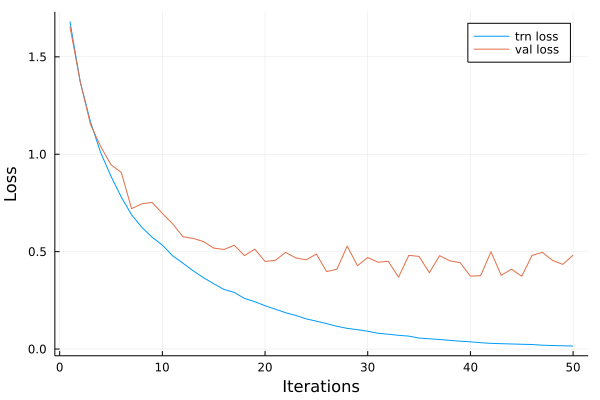

In [95]:
plot([best_model_b[1,:], best_model_b[2,:]],
    labels=["trn loss" "val loss" ],xlabel="Iterations",ylabel="Loss")

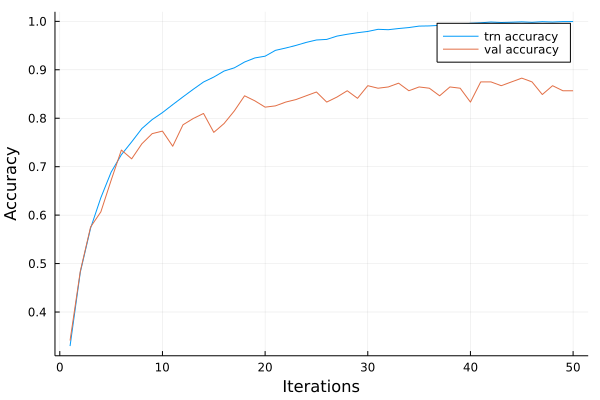

In [96]:
plot([best_model_b[3,:], best_model_b[4,:]],
    labels=["trn accuracy" "val accuracy" ],xlabel="Iterations",ylabel="Accuracy")

In [97]:
best_model_gs = load("/Users/ufukaltun/Documents/koç/dersler/ku deep learning/project_final/results_gs_target_cartoon.jld2")["results"];

In [98]:
best_model_gs = reshape(collect(Float32,flatten(best_model_gs)),(4,:));

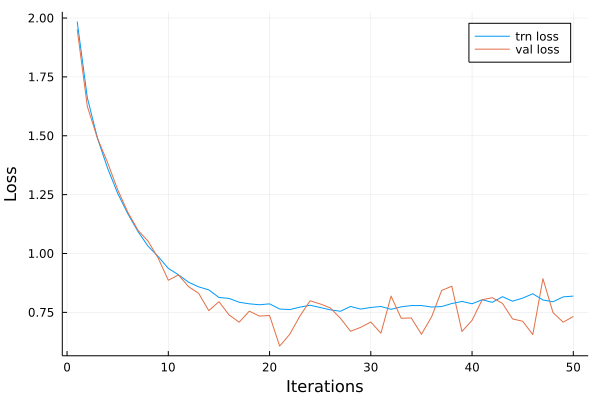

In [99]:
plot([best_model_gs[1,:], best_model_gs[2,:]],
    labels=["trn loss" "val loss" ],xlabel="Iterations",ylabel="Loss")

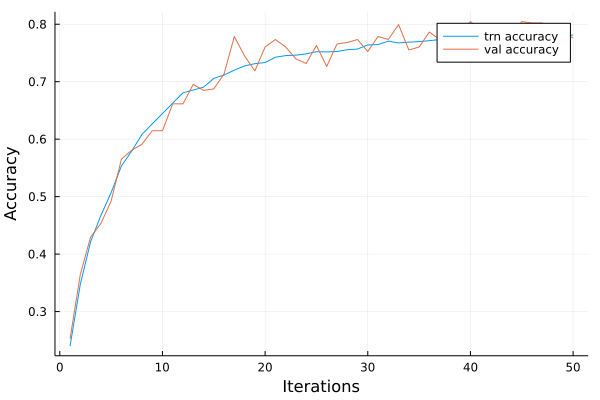

In [100]:
plot([best_model_gs[3,:], best_model_gs[4,:]],
    labels=["trn accuracy" "val accuracy" ],xlabel="Iterations",ylabel="Accuracy")